In [1]:
import numpy as np

In [13]:
a=np.array([[1,2],[2,3],[2,4],[3,5],[8,12],[6,13]])

In [14]:
import matplotlib.pyplot as plt

(0.6401433691756273, 8.359856630824371, 1.434823399558499, 13.565176600441498)

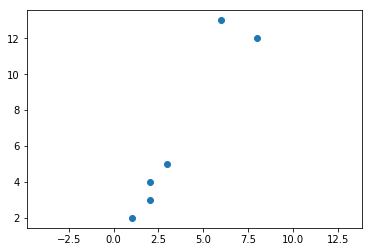

In [15]:
plt.scatter(a[:,0],a[:,1])
plt.axis("equal")

In [22]:
a.shape

(6, 2)

In [39]:
s*np.eye(6,2)

array([[21.9623364 ,  0.        ],
       [ 0.        ,  1.62965632],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [33]:
u,s,v = np.linalg.svd(a)

In [34]:
print((u,s,v))

(array([[-0.10169225,  0.06701379, -0.21740184, -0.25691817, -0.59286901,
        -0.72139009],
       [-0.16370212, -0.16687248,  0.10937339, -0.12778119, -0.72987153,
         0.61996143],
       [-0.20338451,  0.13402758,  0.94492476, -0.03265885, -0.02048492,
        -0.21517973],
       [-0.26539438, -0.09985869, -0.04432299,  0.92886364, -0.19589945,
        -0.12831711],
       [-0.65480849, -0.66748991, -0.06714149, -0.21922773,  0.25737207,
        -0.082909  ],
       [-0.64983591,  0.70298279, -0.20351559, -0.07582847,  0.10371729,
         0.16000833]]), array([21.9623364 ,  1.62965632]), array([[-0.49036368, -0.87151791],
       [-0.87151791,  0.49036368]]))


In [44]:
a.T.dot(a)

array([[118, 205],
       [205, 367]])

(-0.5148818600368836,
 0.024518183811280174,
 -0.9150938040468632,
 0.043575895430803015)

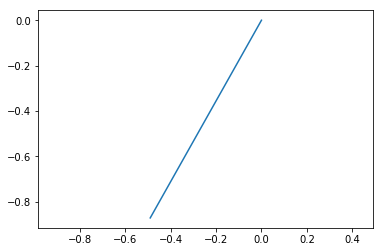

In [38]:
plt.plot([0,v[0][0]],[0, v[0][1]])
plt.axis("equal")

In [2]:
class PCA:
    def __init__(self, k):
        self.k = k

    def fit(self, data):
        """
        finds best params for X = Mu + A * Lambda
        :param data: data of shape (number of samples, number of features)
        HINT! use SVD
        """
        u,s,v = np.linalg.svd(data)
        indexes = s.argsort()[-self.k:][::-1]
        self.basis = v[indexes]

    def transform(self, data):
        """
        for given data returns Lambdas
        x_i = mu + A dot lambda_i
        where mu is location_, A is matrix_ and lambdas are projection of x_i
        on linear space from A's rows as basis
        :param data: data of shape (number of samples, number of features)
        """
        # Lemma: x is vector and A dot A.T == I, then x's coordinates in Linear Space(A's rows as basis)
        # is A dot x
        return np.ones((len(data), self.k))


In [ ]:
#!/usr/bin/env python3
"""
This is a boilerplate file for you to get started on MNIST dataset and run SVD.

This file has code to read labels and data from .gz files you can download from
http://yann.lecun.com/exdb/mnist/

Files will work if train-images-idx3-ubyte.gz file and
train-labels-idx1-ubyte.gz files are in the same directory as this
python file.
"""
from __future__ import print_function
import argparse
import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt
# TODO: Import you PCA


def parse_args(*argument_array):
    parser = argparse.ArgumentParser()
    parser.add_argument('--mnist-train-data',
                        default='train-images-idx3-ubyte.gz',  # noqa
                        help='Path to train-images-idx3-ubyte.gz file '
                        'downloaded from http://yann.lecun.com/exdb/mnist/')
    args = parser.parse_args(*argument_array)
    return args


def main(args):
    # Read data file into numpy matrices
    with gzip.open(args.mnist_train_data, 'rb') as in_gzip:
        magic, num, rows, columns = struct.unpack('>IIII', in_gzip.read(16))
        all_data = [np.array(struct.unpack('>{}B'.format(rows * columns),
                                           in_gzip.read(rows * columns)))
                    for _ in range(60000)]

    # TODO: Use Decompose into 5 components and plot the 5 components.
    f, axarr = plt.subplots(1, 5, figsize=(18, 4), sharey=True)
    for i in range(5):
        # TODO: Plot each of the component in its subplot.
        axarr[i].set_aspect('equal')
        axarr[i].set_title('Component {}'.format(i + 1))
    plt.tight_layout()
    name = 'TODO'  # TODO: Remplace name with your name
    plt.savefig('comps-{}.png'.format(name), dpi=320)


if __name__ == '__main__':
    args = parse_args()
    main(args)